<a href="https://colab.research.google.com/github/NoCodeProgram/deepLearning/blob/main/detectSegment/mmSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U openmim
!mim install "mmengine>=0.7.0"
!mim install "mmcv>=2.0.0rc4"


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 424.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.9/298.9 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.1/953.1 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.0/94.0 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━

Looking in links: https://download.openmmlab.com/mmcv/dist/cu121/torch2.1.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 450.4/450.4 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 19.2 MB/s eta 0:00:00
Looking in links: https://download.openmmlab.com/mmcv/dist/cu121/torch2.1.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.1/94.1 MB 7.2 MB/s eta 0:00:00


In [ ]:
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection

!pip install -e .


fatal: destination path 'mmdetection' already exists and is not an empty directory.
/content/mmdetection
Obtaining file:///content/mmdetection
  Preparing metadata (setup.py) ... done
  Attempting uninstall: mmdet
    Found existing installation: mmdet 3.2.0
    Uninstalling mmdet-3.2.0:
      Successfully uninstalled mmdet-3.2.0
  Running setup.py develop for mmdet


In [ ]:
# Check Pytorch installation
import torch, torchvision
print("torch version:",torch.__version__, "cuda:",torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print("mmdetection:",mmdet.__version__)

# Check mmcv installation
import mmcv
print("mmcv:",mmcv.__version__)

# Check mmengine installation
import mmengine
print("mmengine:",mmengine.__version__)

torch version: 2.1.0+cu121 cuda: True
mmdetection: 3.2.0
mmcv: 2.1.0
mmengine: 0.10.2


In [ ]:
%cd ..

/content


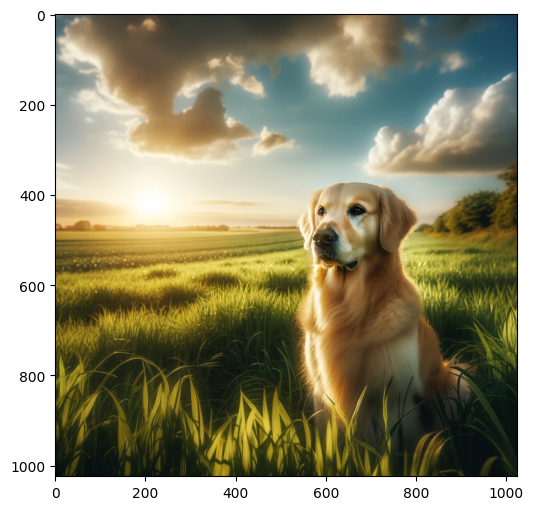

In [ ]:
import matplotlib.pyplot as plt
img = mmcv.imread('./dog.png')
plt.figure(figsize=(8, 6))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

In [ ]:
!wget https://download.openmmlab.com/mmdetection/v2.0/panoptic_fpn/panoptic_fpn_r101_fpn_mstrain_3x_coco/panoptic_fpn_r101_fpn_mstrain_3x_coco_20210823_114712-9c99acc4.pth

--2023-12-26 21:26:55--  https://download.openmmlab.com/mmdetection/v2.0/panoptic_fpn/panoptic_fpn_r101_fpn_mstrain_3x_coco/panoptic_fpn_r101_fpn_mstrain_3x_coco_20210823_114712-9c99acc4.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 163.181.66.104, 163.181.66.105, 163.181.66.106, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|163.181.66.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 260626024 (249M) [application/octet-stream]
Saving to: ‘panoptic_fpn_r101_fpn_mstrain_3x_coco_20210823_114712-9c99acc4.pth’

panoptic_fpn_r101_f 100%[===================>] 248.55M  8.11MB/s    in 30s     

2023-12-26 21:27:26 (8.33 MB/s) - ‘panoptic_fpn_r101_fpn_mstrain_3x_coco_20210823_114712-9c99acc4.pth’ saved [260626024/260626024]



In [ ]:
!pip install git+https://github.com/cocodataset/panopticapi.git

  Cloning https://github.com/cocodataset/panopticapi.git to /tmp/pip-req-build-jvpvbvau
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/panopticapi.git /tmp/pip-req-build-jvpvbvau
  Resolved https://github.com/cocodataset/panopticapi.git to commit 7bb4655548f98f3fedc07bf37e9040a992b054b0
  Preparing metadata (setup.py) ... done
  Created wheel for panopticapi: filename=panopticapi-0.1-py3-none-any.whl size=8306 sha256=e238f5a1435d415889871b8083d647d9e5926f0ac170f840ca1325ff96d99d3f
  Stored in directory: /tmp/pip-ephem-wheel-cache-mp5qm_m1/wheels/70/87/ae/5c2b138c967549070e3fe35f3b5fcaf1ed56e9f5483a09ee65
Successfully built panopticapi


In [ ]:

import mmcv
import mmengine
from mmdet.apis import init_detector, inference_detector
from mmdet.utils import register_all_modules

config_file = './mmdetection/configs/panoptic_fpn/panoptic-fpn_r101_fpn_ms-3x_coco.py'  # Update with the correct config
checkpoint_file = './panoptic_fpn_r101_fpn_mstrain_3x_coco_20210823_114712-9c99acc4.pth'  # Update with the correct model checkpoint


register_all_modules()
model = init_detector(config_file, checkpoint_file, device='cuda:0')  # or device='cuda:0'



Loads checkpoint by local backend from path: ./panoptic_fpn_r101_fpn_mstrain_3x_coco_20210823_114712-9c99acc4.pth


In [ ]:

image = mmcv.imread('./dog.png',channel_order='rgb')
result = inference_detector(model, image)


In [ ]:
from mmdet.registry import VISUALIZERS
# init visualizer(run the block only once in jupyter notebook)
visualizer = VISUALIZERS.build(model.cfg.visualizer)
# the dataset_meta is loaded from the checkpoint and
# then pass to the model in init_detector
visualizer.dataset_meta = model.dataset_meta

/usr/local/lib/python3.10/dist-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


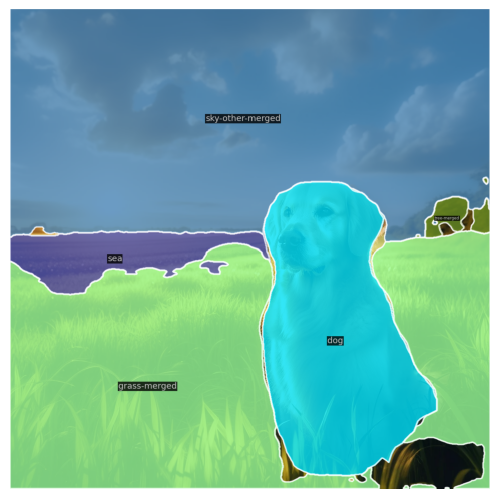

In [ ]:
# show the results
visualizer.add_datasample(
    'result',
    image,
    data_sample=result,
    draw_gt = None,
    wait_time=0,
)
visualizer.show()
